## Let's do some data science

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/jayunruh/python_introDS_course/blob/master/intro_to_python04_pandas.ipynb)

## Do the imports

When doing data science things you are often reading many data files from
nested directories. We will use the standard python packages `os` and `glob`
to help with that.

We will be using pandas for data analysis; it is typically imported with a nickname (like numpy is).
```python
import pandas as pd
```

We can also import `numpy` in case we need it.

Remember, you can always add more packages to import later on by adding them to the cell and rerunning it.

In [162]:
import os
import glob

import pandas as pd
import numpy as np
from IPython.display import Image

## The Data

### 2019 KC Corporate Challenge 5k

#### Description
This data set is the final results of the Corporate Challenge 5k race. Like most road races, runners are placed in divisions for mens/womens and age range. This dataset also has the company/organization the runner works for, and a division based on the size of the company.

The data is in multiple csv files base on age and m/w in the foleder `Data`

In [2]:
#if you are running from colab you will need to get the data from github first
#uncomment these lines and run the first time you run the notebook
#!wget 'https://github.com/jayunruh/python_introDS_course/raw/main/Data.zip'
#!unzip -o Data.zip
#cleanup the zipped version
#!rm Data.zip

In [3]:
### Use os to list the files (notice they aren't sorted)
files = os.listdir('Data')
files

['20240321_Map.csv',
 'Centromeres.bmp',
 'Centromeres.png',
 'Centromeres.tif',
 'divisions.csv',
 'homework4_p1.csv',
 'homework4_p2.csv',
 'Lesson5b.csv',
 'Results.csv',
 'Results_M20.csv',
 'Results_M25.csv',
 'Results_M30.csv',
 'Results_M35.csv',
 'Results_M40.csv',
 'Results_M45.csv',
 'Results_M50.csv',
 'Results_M55.csv',
 'Results_M60.csv',
 'Results_M65.csv',
 'Results_M70.csv',
 'Results_W20.csv',
 'Results_W25.csv',
 'Results_W30.csv',
 'Results_W35.csv',
 'Results_W40.csv',
 'Results_W45.csv',
 'Results_W50.csv',
 'Results_W55.csv',
 'Results_W60.csv',
 'Results_W65.csv',
 'Results_W70.csv']

In [4]:
### Use glob to list the files
gfiles = glob.glob('Data/Results*.csv')
gfiles

['Data\\Results.csv',
 'Data\\Results_M20.csv',
 'Data\\Results_M25.csv',
 'Data\\Results_M30.csv',
 'Data\\Results_M35.csv',
 'Data\\Results_M40.csv',
 'Data\\Results_M45.csv',
 'Data\\Results_M50.csv',
 'Data\\Results_M55.csv',
 'Data\\Results_M60.csv',
 'Data\\Results_M65.csv',
 'Data\\Results_M70.csv',
 'Data\\Results_W20.csv',
 'Data\\Results_W25.csv',
 'Data\\Results_W30.csv',
 'Data\\Results_W35.csv',
 'Data\\Results_W40.csv',
 'Data\\Results_W45.csv',
 'Data\\Results_W50.csv',
 'Data\\Results_W55.csv',
 'Data\\Results_W60.csv',
 'Data\\Results_W65.csv',
 'Data\\Results_W70.csv']

In [5]:
### Use glob to list the files starting with W
w_gfiles = glob.glob('Data/*W*.csv')
w_gfiles

['Data\\homework4_p1.csv',
 'Data\\homework4_p2.csv',
 'Data\\Results_W20.csv',
 'Data\\Results_W25.csv',
 'Data\\Results_W30.csv',
 'Data\\Results_W35.csv',
 'Data\\Results_W40.csv',
 'Data\\Results_W45.csv',
 'Data\\Results_W50.csv',
 'Data\\Results_W55.csv',
 'Data\\Results_W60.csv',
 'Data\\Results_W65.csv',
 'Data\\Results_W70.csv']

### Read some data
The read one of the files from the glob list

In [6]:
print(gfiles[5])
df5 = pd.read_csv(gfiles[5])

Data\Results_M40.csv


In [7]:
'''
Look at the dataframe
what are the columns and rows, etc.
'''
df5

,Unnamed: 0,Place,Last Name,First Name,Company,Time
0,0,1,Bonham,Mike,Commerce Bank,17:34.7
1,1,2,Hacker,Rikki,Pain Train,17:54.3
2,2,3,Larson,Brent,Burns & McDonnell,18:02.5
3,3,4,Wood,Steve,INTL FCStone,18:17.0
4,4,5,Garrett,Jeremy,Children's Mercy Hospital,18:22.5
...,...,...,...,...,...,...
172,172,173,Thompson,Patrick,Hollis+Miller Architects,49:22.2
173,173,174,Davidson,Dave,National Beef Packing Company,52:55.2
174,174,175,Partida,Freddy,"Southern Star Central Gas Pipeline, Inc",53:35.5
175,175,176,Johnston,Jason,Service Management Group,55:12.5


In [8]:
'''Look at the dataframe with head/tail/sample'''
df5.sample(10)

,Unnamed: 0,Place,Last Name,First Name,Company,Time
175,175,176,Johnston,Jason,Service Management Group,55:12.5
87,87,88,Asamoah,Nathan,"Huhtamaki, Inc.",26:02.9
70,70,71,Williams,Spurgeon,"Associated Wholesale Grocers, Inc.",24:45.4
0,0,1,Bonham,Mike,Commerce Bank,17:34.7
76,76,77,Cooley,John Paul,Marine Corps Info Technology Center,24:58.3
102,102,103,Ron,Ayax,Fike Corporation,27:33.0
165,165,166,VanLeeuwen,Alex,"P1 Group, Inc.",39:16.9
46,46,47,Landvik,Mike,Missouri Department of Transportation,22:37.8
118,118,119,Ray,Chad,Federal Reserve Bank of Kansas City,28:52.4
35,35,36,Gekas,Michael,McCownGordon Construction,21:24.8


### Accessing columns
To access the data in columns, either a dot with column name or
dictionary key type syntax can be used:

```python
xdiv1 = df.Div

xdiv2 = df['Div']
```

This can't be done if the column name has as space, like `Last Name` (or other ridiculousness).

I like using the ['Div'] method, as it always works regardless of column name, and because df.Div makes it look like Div is a function of df which is confusing

In [33]:
df5[['First Name', 'Last Name']]

,First Name,Last Name
0,Mike,Bonham
1,Rikki,Hacker
2,Brent,Larson
3,Steve,Wood
4,Jeremy,Garrett
...,...,...
172,Patrick,Thompson
173,Dave,Davidson
174,Freddy,Partida
175,Jason,Johnston


In [ ]:
### make new columns from existing columns

df5['name'] = df5['First Name'] + ' ' + df5['Last Name']
df5.sample(5)

### Read all of the data
We want to read all of the csv files and combine them into one dataframe.

Each row in the dataframe will need a label to identify what file it came from, so we can group by age, etc.

In [34]:
## write a function that returns the M or W and the the age group
def extract_group(filename):
    '''
    Extract the group from the filename
    
    Parameters
    ----------
    filename : str
        The name of the csv file for the group
        
    Returns
    -------
    m_or_w, age : tuple(str, int)
    '''
    basename = os.path.basename(filename)
    base = basename[:-4]
    base_split = base.split('_')
    m_or_w = base_split[1][0]
    age = int(base_split[1][1:])  ## is this what we want?
    return m_or_w, age

In [11]:
#if you document your functions well we can see what they do:
#extract_group?

In [35]:
gfiles[3]

'Data\\Results_M30.csv'

In [36]:
extract_group(gfiles[3])

('M', 30)

In [38]:
df_list = list()

for f in gfiles:
    print(f)
    m_or_w, age = extract_group(f)
    temp_df = pd.read_csv(f)
    temp_df['m_or_w'] = m_or_w
    temp_df['age'] = age
    df_list.append(temp_df)
    
df = pd.concat(df_list)
df 

Data\Results_M20.csv
Data\Results_M25.csv
Data\Results_M30.csv
Data\Results_M35.csv
Data\Results_M40.csv
Data\Results_M45.csv
Data\Results_M50.csv
Data\Results_M55.csv
Data\Results_M60.csv
Data\Results_M65.csv
Data\Results_M70.csv
Data\Results_W20.csv
Data\Results_W25.csv
Data\Results_W30.csv
Data\Results_W35.csv
Data\Results_W40.csv
Data\Results_W45.csv
Data\Results_W50.csv
Data\Results_W55.csv
Data\Results_W60.csv
Data\Results_W65.csv
Data\Results_W70.csv


,Unnamed: 0,Place,Last Name,First Name,Company,Time,m_or_w,age
0,0,1,Foster,Jason,Sprint,18:00.8,M,20
1,1,2,Lawson,Matthew,PwC,18:27.9,M,20
2,2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),18:59.1,M,20
3,3,4,Salisbury,Luke,Black & Veatch,19:09.4,M,20
4,4,5,De Paz,Josue,Commerce Bank,19:19.4,M,20
...,...,...,...,...,...,...,...,...
11,11,12,Erdmann,Ann,NorthPoint Development,56:26.0,W,70
12,12,13,Hodge,Shannon,SelectQuote Insurance Services,58:07.3,W,70
13,13,14,Riepenkroger,Karen,Sprint,59:30.8,W,70
14,14,15,Reid,Mary,"Design Resources, Inc",1:00:31.2,W,70


In [39]:
## get rid of the columns that are not meaningful ('Unnamed: 0')
df = df.drop(['Unnamed: 0'], axis=1)

In [44]:
#we can use unique() to find out how many unique values a column has
print(df.Company.unique())
df.Company.unique().shape

['Sprint' 'PwC' 'MHC (Murphy-Hoffman Company)' 'Black & Veatch'
 'Commerce Bank' 'Farmers Insurance Group'
 'Missouri Department of Transportation' 'McCownGordon Construction'
 'Burns & McDonnell' 'Kiewit' 'Pain Train' 'Hallmark Cards, Inc.'
 'P1 Group, Inc.' 'Garmin International' 'DH Pace' 'Deloitte LLP'
 'Cerner Corporation' 'GBA' 'B.E. Smith' 'SelectQuote Insurance Services'
 'SS&C DST' 'Stowers Institute for Medical Research'
 'American Century Investments' 'Crossfirst Bank'
 'Federal Reserve Bank of Kansas City' 'POWER Engineers'
 'PRA Health Sciences' 'Pro Athlete, Inc.' 'City of Kansas City, Missouri'
 'H&R Block' 'BKD' 'Citoxlab' 'Honeywell' 'Andrews McMeel Universal'
 'YRC Freight' 'Service Management Group' 'SPX Cooling Technologies, Inc.'
 'Engaged Companies' 'KeyBank Real Estate Capital'
 'Allegis Group - Aerotek/Aston/Carter/TEKsystems'
 'Kansas City Bone & Joint Clinic' 'Fike Corporation' 'HNTB Corporation'
 'Turner Construction' 'PNC Bank' 'Marine Corps Info Technology 

(214,)

# Merging

### Company Divisions

Companies are placed in divisions based on their number of employees. The division for each company is
listed in Data/divisions.csv.

Read divisions.csv into a dataframe and merge that with the dataframe `df`

In [46]:
div_df = pd.read_csv('Data/divisions.csv')
div_df

,company_name,Div
0,AMC Theatres,C
1,APEX Orthopedics and Sports Medicine Team,H
2,Accenture,F
3,Ad Astra,H
4,Affinis Corp/Zelis Healthcare,H
...,...,...
209,Zillow Home Loans,E
210,Zurich,D
211,"eSolutions, Inc.",G
212,iModules,H


In [47]:
### Use merge to combine the two dataset
#left_on is the column in df that we want to merge based on
#right_on is the div_df column
#note that this is a "join" in datascience language and uses many of the same options
df = df.merge(div_df, left_on=['Company'], right_on='company_name')

In [48]:
### make new columns from existing columns
### name from First Name and Last Name
df['name'] = df['First Name'] + " " + df['Last Name']
df.sample(5)

,Place,Last Name,First Name,Company,Time,m_or_w,age,company_name,Div,name
932,8,Gurung,Kushal,Cerner Corporation,19:24.7,M,45,Cerner Corporation,A,Kushal Gurung
2279,40,Stone,Allison,Cerner Corporation,29:15.8,W,40,Cerner Corporation,A,Allison Stone
2670,89,Jurgeson,Patty,Lockton Companies,42:42.6,W,50,Lockton Companies,B,Patty Jurgeson
1930,102,Palmer,Erin,Enterprise Rent-a-Car,31:57.3,W,30,Enterprise Rent-a-Car,D,Erin Palmer
795,48,Pottorf,Justin,Multivac,22:44.6,M,40,Multivac,F,Justin Pottorf


In [86]:
# Do not need the 'company_name' column from the divisions.csv table anymore
df = df.drop(['company_name'], axis=1)

### Column data dtype

Look at the data type of each column to see if it makes sense

In [50]:
df.dtypes
# Anything non-numeric is an object

Place            int64
Last Name       object
First Name      object
Company         object
Time            object
m_or_w          object
age              int64
company_name    object
Div             object
name            object
dtype: object

# Parsing

### The Time column is a str

This will need to be converted to a float to do any ranking or math. This will involve String functions and type conversions. 

In [52]:
## mess around with df str functions
s = '1:23:45.5'
s.split(':')

['1', '23', '45.5']

In [53]:
## pandas str functions

df['Company'].str.split(' ').str[0]

0            Sprint
1               PwC
2               MHC
3             Black
4          Commerce
           ...     
3002     NorthPoint
3003    SelectQuote
3004         Sprint
3005         Design
3006      Community
Name: Company, Length: 3007, dtype: object

### work on the Time column

What do you get when splitting with ":"

```python
df.Time.str.split(":")
df.Time.str.split(":").str.len()
```

In [54]:
### How to use split on a series
df['Time'].str.split(":")

0          [18, 00.8]
1          [18, 27.9]
2          [18, 59.1]
3          [19, 09.4]
4          [19, 19.4]
            ...      
3002       [56, 26.0]
3003       [58, 07.3]
3004       [59, 30.8]
3005    [1, 00, 31.2]
3006    [1, 03, 11.0]
Name: Time, Length: 3007, dtype: object

In [55]:
### How to use split on a series

df['Time'].str.split(":").str.len().unique()

array([2, 3])

In [56]:
### Use str indexing
### be aware of NaNs

df['Time'].str.split(":").str[-3]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
3002    NaN
3003    NaN
3004    NaN
3005      1
3006      1
Name: Time, Length: 3007, dtype: object

In [61]:
 '''
Make a new column that is the time in minutes as a float

Use the str split and str indexing.
Make a new series for seconds, minutes and hours, then do some math
to make a minutes column
'''

seconds = df['Time'].str.split(":").str[-1].astype('float')
minutes = df['Time'].str.split(":").str[-2].astype('float')
hours = df['Time'].str.split(":").str[-3].astype('float').fillna(0) # If there is no hour, will return NaN, fillna(0) will replace NaN with 0

df['minutes'] = 60*hours + minutes + seconds/60
df

,Place,Last Name,First Name,Company,Time,m_or_w,age,company_name,Div,name,minutes
0,1,Foster,Jason,Sprint,18:00.8,M,20,Sprint,A,Jason Foster,18.013333
1,2,Lawson,Matthew,PwC,18:27.9,M,20,PwC,F,Matthew Lawson,18.465000
2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),18:59.1,M,20,MHC (Murphy-Hoffman Company),D,Andy Kaiser,18.985000
3,4,Salisbury,Luke,Black & Veatch,19:09.4,M,20,Black & Veatch,A,Luke Salisbury,19.156667
4,5,De Paz,Josue,Commerce Bank,19:19.4,M,20,Commerce Bank,A,Josue De Paz,19.323333
...,...,...,...,...,...,...,...,...,...,...,...
3002,12,Erdmann,Ann,NorthPoint Development,56:26.0,W,70,NorthPoint Development,F,Ann Erdmann,56.433333
3003,13,Hodge,Shannon,SelectQuote Insurance Services,58:07.3,W,70,SelectQuote Insurance Services,C,Shannon Hodge,58.121667
3004,14,Riepenkroger,Karen,Sprint,59:30.8,W,70,Sprint,A,Karen Riepenkroger,59.513333
3005,15,Reid,Mary,"Design Resources, Inc",1:00:31.2,W,70,"Design Resources, Inc",G,Mary Reid,60.520000


### Column mapping

Another way to do this is mapping the values in a column to a function. The function is run on every entry in the column

In [ ]:
def time_to_minutes(x):
    sp = x.split(":")
    seconds = float(sp[-1])
    minutes = float(sp[-2])
    if len(sp) == 3:
        hours = float(sp[0])
    else:
        hours = 0
    
    return 60*hours + minutes + seconds/60

time_to_minutes('24:2.0')

In [ ]:
df['minutes2'] = df['Time'].map(time_to_minutes)
df

In [66]:
### Runners like to know the pace they run in km/minute or miles/minute
### columns can be added by doing some math

race_length = 5
df['k_pace'] = (df['minutes'])/race_length
df['mile_pace'] = (df['k_pace']/0.621371)
df

,Place,Last Name,First Name,Company,Time,m_or_w,age,company_name,Div,name,minutes,k_pace,mile_pace
0,1,Foster,Jason,Sprint,18:00.8,M,20,Sprint,A,Jason Foster,18.013333,3.602667,5.797932
1,2,Lawson,Matthew,PwC,18:27.9,M,20,PwC,F,Matthew Lawson,18.465000,3.693000,5.943309
2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),18:59.1,M,20,MHC (Murphy-Hoffman Company),D,Andy Kaiser,18.985000,3.797000,6.110681
3,4,Salisbury,Luke,Black & Veatch,19:09.4,M,20,Black & Veatch,A,Luke Salisbury,19.156667,3.831333,6.165935
4,5,De Paz,Josue,Commerce Bank,19:19.4,M,20,Commerce Bank,A,Josue De Paz,19.323333,3.864667,6.219580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,12,Erdmann,Ann,NorthPoint Development,56:26.0,W,70,NorthPoint Development,F,Ann Erdmann,56.433333,11.286667,18.164135
3003,13,Hodge,Shannon,SelectQuote Insurance Services,58:07.3,W,70,SelectQuote Insurance Services,C,Shannon Hodge,58.121667,11.624333,18.707557
3004,14,Riepenkroger,Karen,Sprint,59:30.8,W,70,Sprint,A,Karen Riepenkroger,59.513333,11.902667,19.155491
3005,15,Reid,Mary,"Design Resources, Inc",1:00:31.2,W,70,"Design Resources, Inc",G,Mary Reid,60.520000,12.104000,19.479506


In [68]:
### look at the stats of the times

df['minutes'].describe()

count    3007.000000
mean       33.720467
std        11.110113
min        16.423333
25%        25.336667
50%        30.391667
75%        40.189167
max        70.986667
Name: minutes, dtype: float64

In [70]:
## looks at some of the stats functions on the mintutes column

df['minutes'].min(), df['minutes'].max(), df['minutes'].median(), df['minutes'].mean()

(np.float64(16.423333333333332),
 np.float64(70.98666666666666),
 np.float64(30.391666666666666),
 np.float64(33.720467243099435))

<Axes: >

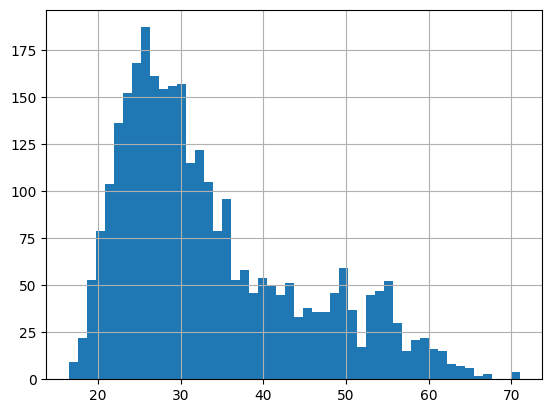

In [71]:
# show a histogram using the pandas ploting functions
df['minutes'].hist(bins=50)

# Subsetting the data

In [72]:
### multiple selections with &
### how is >= 50 years old and runs faster than 20 minutes?

df[(df['minutes'] < 20) & (df['age'] > 50)]

,Place,Last Name,First Name,Company,Time,m_or_w,age,company_name,Div,name,minutes,k_pace,mile_pace
1390,1,McCormack,Stan,KCP&L Westar,19:17.3,M,60,KCP&L Westar,A,Stan McCormack,19.288333,3.857667,6.208315
1391,2,Harber,Robert,Garmin International,19:50.4,M,60,Garmin International,A,Robert Harber,19.840000,3.968000,6.385879


In [91]:
df[(df['Div'] == 'D') & (df['age'] == 50) & (df['m_or_w'] == 'M')]['name']

1101                Ron Yu
1105            Bob Rhodes
1108    William TODD Sells
1113         Brant Ronning
1118           Craig Zahnd
1119           Brad Wright
1121            Chris Wood
1135        Anthony Graves
1141        scott langford
1146          Michael Dohr
1147            Ed Johnson
1150           Faruk Capan
1156          Jeff Thimgan
1162         Joseph Walker
1168               Ed Ihde
1179      Christopher Culp
1185           Steve Ferro
1190          Greg Edmonds
1195       Nelson Dantzler
1213           Kirt DeHaan
1221            Brad Smith
1223      Jeremy Wilkinson
1224            Tim Thomas
1229          John Johnson
1251        Eugene Jackson
Name: name, dtype: object

### using loc and iloc

In [92]:
# .loc lets you do pretty much what we did before
df.loc[(df['minutes'] < 20) & (df['age'] > 50)]

1390    Stan McCormack
1391     Robert Harber
Name: name, dtype: object

In [93]:
# except if we also want a column, instead of adding another ['name'] to the end, we put it in the original ['']
df.loc[(df['Div'] == 'D') & (df['age'] == 50) & (df['m_or_w'] == 'M'),'name']

1101                Ron Yu
1105            Bob Rhodes
1108    William TODD Sells
1113         Brant Ronning
1118           Craig Zahnd
1119           Brad Wright
1121            Chris Wood
1135        Anthony Graves
1141        scott langford
1146          Michael Dohr
1147            Ed Johnson
1150           Faruk Capan
1156          Jeff Thimgan
1162         Joseph Walker
1168               Ed Ihde
1179      Christopher Culp
1185           Steve Ferro
1190          Greg Edmonds
1195       Nelson Dantzler
1213           Kirt DeHaan
1221            Brad Smith
1223      Jeremy Wilkinson
1224            Tim Thomas
1229          John Johnson
1251        Eugene Jackson
Name: name, dtype: object

In [94]:
### iloc uses numerical indices for slicing
### as always it is rows first, then columns
df.iloc[1000:1010, 1:5]

,Last Name,First Name,Company,Time
1000,Gillespie,Robert,Commerce Bank,25:56.6
1001,Smith,Rick,Dimensional Innovations,25:57.9
1002,Gonzales,Gabe,Rosnet,25:59.3
1003,Sharp,Chris,IBT Industrial Solutions,26:01.0
1004,willard,kirk,Citoxlab,26:07.4
1005,Bisoni,Christopher,Littler,26:08.3
1006,Brookstein,Mark,Capitol Federal,26:11.6
1007,Meoli,Nick,Engaged Companies,26:14.1
1008,Shank,Darin,Bank of America,26:15.5
1009,Ames,Rob,Corbion,26:18.9


### Editing the dataframe
Sprint merged with T-Mobile and Cerner was bought by Oracle

In [82]:
df[df['Company'] == 'Sprint']['Company'] = 'T-Mobile'
df[df['Company'] == 'T-Mobile']

C:\Users\catseanjohn\AppData\Local\Temp\ipykernel_17716\1956328013.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df['Company'] == 'Sprint']['Company'] = 'T-Mobile'


,Place,Last Name,First Name,Company,Time,m_or_w,age,company_name,Div,name,minutes,k_pace,mile_pace


In [ ]:
# Have to use .loc to set values in a dataframe
df.loc[df['Company'] == 'Sprint', 'Company'] = 'T-Mobile'
df.loc[df['Company'] == 'Cerner Corporation', 'Company'] = 'Oracle'

In [97]:
df[df.Company=='Sprint'].head()

,Place,Last Name,First Name,Company,Time,m_or_w,age,Div,name,minutes,k_pace,mile_pace


In [99]:
df[df['Company']=='T-Mobile'].head()

,Place,Last Name,First Name,Company,Time,m_or_w,age,Div,name,minutes,k_pace,mile_pace
0,1,Foster,Jason,T-Mobile,18:00.8,M,20,A,Jason Foster,18.013333,3.602667,5.797932
56,57,Gates,Garrett,T-Mobile,25:29.1,M,20,A,Garrett Gates,25.485000,5.097000,8.202829
246,146,C,Mario,T-Mobile,27:49.1,M,25,A,Mario C,27.818333,5.563667,8.953856
283,183,LeBlanc,Austin,T-Mobile,31:55.7,M,25,A,Austin LeBlanc,31.928333,6.385667,10.276738
362,49,Wagner,Mark,T-Mobile,21:55.5,M,30,A,Mark Wagner,21.925000,4.385000,7.056976


# groupby()

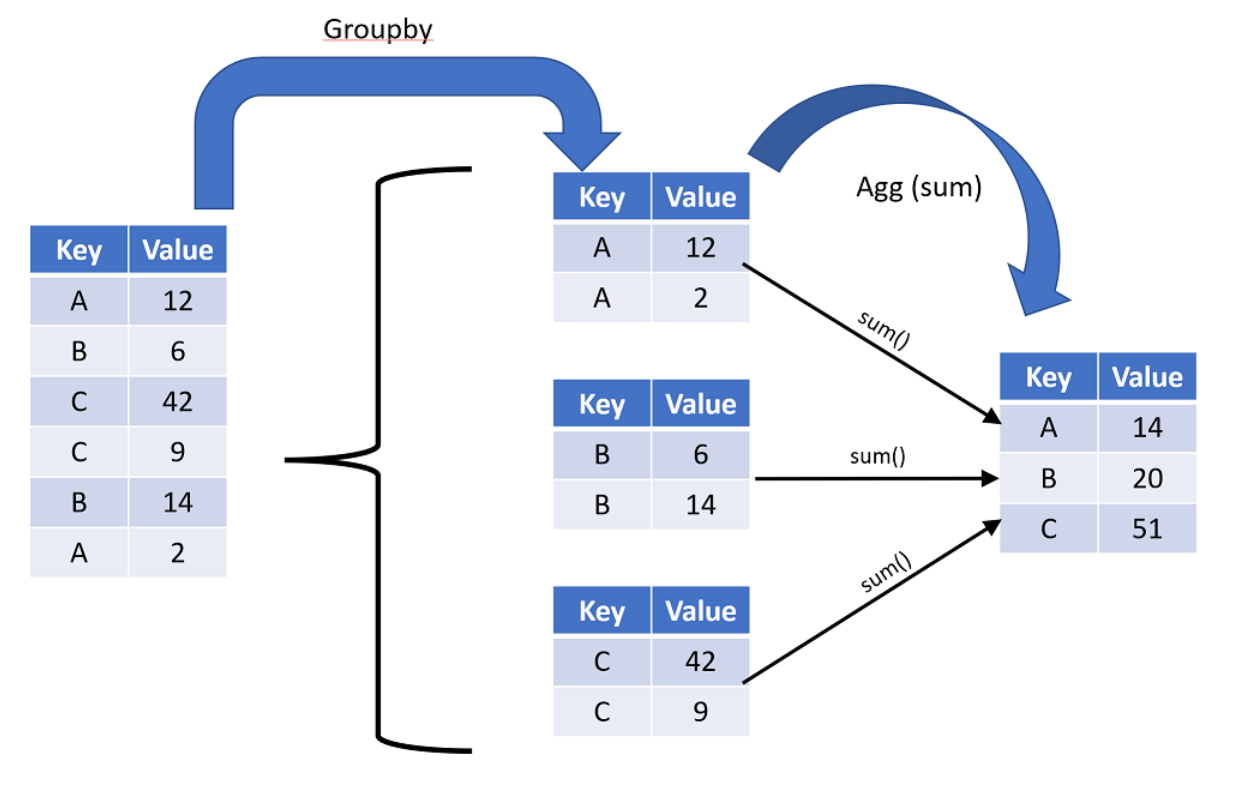

In [163]:
display(Image('Data/groupby.png'))


### .agg()
Combining groupby() and agg() is much like doing pivot tables in excel, but we can do more complicated things and do them more easily.

In [105]:
# groupby() itself does not do much, it just sets up groupings, here we are setting up an object that puts everyone that is in the same Div, age, and gender together
df.groupby(['Div', 'age', 'm_or_w']) 

In [112]:
# To actually do something useful with the groupings, we need to use an aggregation function
df.groupby(['Div', 'age', 'm_or_w']).agg({'mile_pace':'mean', 'minutes':'mean'})

mile_pace    minutes
Div age m_or_w                      
A   20  M        6.970008  21.654804
        W        9.156701  28.448542
    25  M        7.769636  24.139133
        W        8.424532  26.173800
    30  M        7.334597  22.787531
...                   ...        ...
I   55  W       15.836164  49.200667
    60  M       10.755786  33.416667
        W       15.987228  49.670000
    65  M       13.420324  41.695000
        W       21.147860  65.703333

[193 rows x 2 columns]

In [114]:
# Unforunately this creates a multi-index dataframe, which is not always easy to work with, .reset_index() keeps it the way we like it
df.groupby(['Div', 'age', 'm_or_w']).agg({'mile_pace':'mean', 'minutes':'mean'}).reset_index()

,Div,age,m_or_w,mile_pace,minutes
0,A,20,M,6.970008,21.654804
1,A,20,W,9.156701,28.448542
2,A,25,M,7.769636,24.139133
3,A,25,W,8.424532,26.173800
4,A,30,M,7.334597,22.787531
...,...,...,...,...,...
188,I,55,W,15.836164,49.200667
189,I,60,M,10.755786,33.416667
190,I,60,W,15.987228,49.670000
191,I,65,M,13.420324,41.695000


In [118]:
# We can also aggregate a single column multiple ways and call it what we want
df.groupby(['Div', 'age', 'm_or_w']).agg(minute_max=('minutes', 'max'), minute_mean=('minutes', 'mean'), minute_min=('minutes', 'min')).reset_index()

,Div,age,m_or_w,minute_max,minute_mean,minute_min
0,A,20,M,25.681667,21.654804,18.013333
1,A,20,W,31.451667,28.448542,25.220000
2,A,25,M,46.613333,24.139133,16.481667
3,A,25,W,35.248333,26.173800,20.045000
4,A,30,M,27.971667,22.787531,18.236667
...,...,...,...,...,...,...
188,I,55,W,60.170000,49.200667,39.413333
189,I,60,M,43.875000,33.416667,28.000000
190,I,60,W,65.736667,49.670000,37.780000
191,I,65,M,41.695000,41.695000,41.695000


### .transform() and .mean()

We can also run functions on JUST the members of the group and return their values (one for each runner)

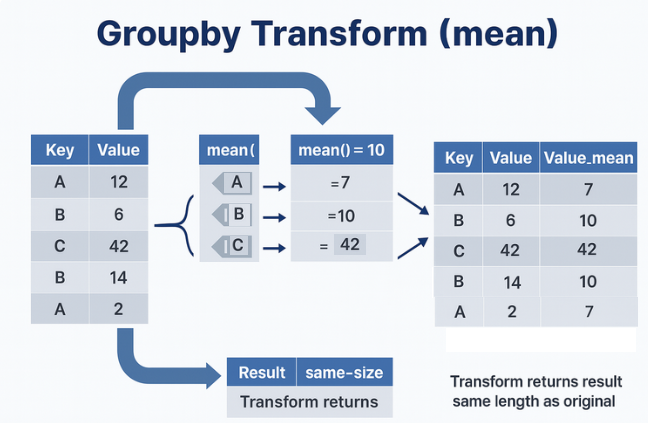

In [164]:
display(Image('Data/transform.png'))


In [157]:
df['group_size'] = df.groupby(['Div', 'age', 'm_or_w'])['minutes'].transform('size')
df

,Place,Last Name,First Name,Company,Time,m_or_w,age,Div,name,minutes,k_pace,mile_pace,div_place,tmp,median_minutes,off_median,winner,group_size
0,1,Foster,Jason,T-Mobile,18:00.8,M,20,A,Jason Foster,18.013333,3.602667,5.797932,1.0,1.0,20.903333,-2.890000,1,17
1,2,Lawson,Matthew,PwC,18:27.9,M,20,F,Matthew Lawson,18.465000,3.693000,5.943309,1.0,1.0,23.892500,-5.427500,1,12
2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),18:59.1,M,20,D,Andy Kaiser,18.985000,3.797000,6.110681,1.0,1.0,25.181667,-6.196667,1,13
3,4,Salisbury,Luke,Black & Veatch,19:09.4,M,20,A,Luke Salisbury,19.156667,3.831333,6.165935,2.0,2.0,20.903333,-1.746667,0,17
4,5,De Paz,Josue,Commerce Bank,19:19.4,M,20,A,Josue De Paz,19.323333,3.864667,6.219580,3.0,3.0,20.903333,-1.580000,0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,12,Erdmann,Ann,NorthPoint Development,56:26.0,W,70,F,Ann Erdmann,56.433333,11.286667,18.164135,1.0,1.0,59.808333,-3.375000,1,2
3003,13,Hodge,Shannon,SelectQuote Insurance Services,58:07.3,W,70,C,Shannon Hodge,58.121667,11.624333,18.707557,2.0,2.0,52.052500,6.069167,0,2
3004,14,Riepenkroger,Karen,T-Mobile,59:30.8,W,70,A,Karen Riepenkroger,59.513333,11.902667,19.155491,6.0,6.0,45.365000,14.148333,0,6
3005,15,Reid,Mary,"Design Resources, Inc",1:00:31.2,W,70,G,Mary Reid,60.520000,12.104000,19.479506,1.0,1.0,60.520000,0.000000,1,1


In [137]:
# Create a new column that holds the median time for each group
df['median_minutes'] = df.groupby(['Div', 'age', 'm_or_w'])['minutes'].transform('median')

In [143]:
# Now for each runner we can see how far off they were from the median time for their group
df['off_median'] = df['minutes'] - df['median_minutes']
df[df['Company']=='Stowers Institute for Medical Research'].sort_values('off_median').tail(10)

,Place,Last Name,First Name,Company,Time,m_or_w,age,Div,name,minutes,k_pace,mile_pace,div_place,tmp,median_minutes,off_median
1699,76,Lawlor,Amanda,Stowers Institute for Medical Research,29:06.1,W,25,D,Amanda Lawlor,29.101667,5.820333,9.366921,10.0,10.0,30.242500,-1.140833
437,124,Kyule,Stephen,Stowers Institute for Medical Research,25:31.3,M,30,D,Stephen Kyule,25.521667,5.104333,8.214631,15.0,15.0,25.715000,-0.193333
232,132,Long,Carter,Stowers Institute for Medical Research,26:39.3,M,25,D,Carter Long,26.655000,5.331000,8.579416,14.0,14.0,26.655000,0.000000
844,97,Unruh,Jay,Stowers Institute for Medical Research,26:55.0,M,40,D,Jay Unruh,26.916667,5.383333,8.663638,11.0,11.0,26.916667,0.000000
1315,61,Karr,David,Stowers Institute for Medical Research,28:04.7,M,55,D,David Karr,28.078333,5.615667,9.037542,12.0,12.0,27.703333,0.375000
1023,99,li,yong,Stowers Institute for Medical Research,27:28.4,M,45,D,yong li,27.473333,5.494667,8.842812,18.0,18.0,26.318333,1.155000
684,139,Lange,Jeff,Stowers Institute for Medical Research,29:07.9,M,35,D,Jeff Lange,29.131667,5.826333,9.376577,21.0,21.0,25.303333,3.828333
703,158,Singh,Vijay,Stowers Institute for Medical Research,32:07.3,M,35,D,Vijay Singh,32.121667,6.424333,10.338966,24.0,24.0,25.303333,6.818333
2520,93,Li,Hua,Stowers Institute for Medical Research,44:03.5,W,45,D,Hua Li,44.058333,8.811667,14.181007,12.0,12.0,36.206667,7.851667
1077,153,Coombs,Darin,Stowers Institute for Medical Research,37:43.9,M,45,D,Darin Coombs,37.731667,7.546333,12.144650,29.0,29.0,26.318333,11.413333


In [132]:
### Use groupby to find the place of runners in their division/age/gender

df['div_place'] = df.groupby(['Div', 'age', 'm_or_w'])['minutes'].rank()
df.sort_values('div_place')

,Place,Last Name,First Name,Company,Time,m_or_w,age,Div,name,minutes,k_pace,mile_pace,div_place,tmp
0,1,Foster,Jason,T-Mobile,18:00.8,M,20,A,Jason Foster,18.013333,3.602667,5.797932,1.0,1.0
1,2,Lawson,Matthew,PwC,18:27.9,M,20,F,Matthew Lawson,18.465000,3.693000,5.943309,1.0,1.0
2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),18:59.1,M,20,D,Andy Kaiser,18.985000,3.797000,6.110681,1.0,1.0
3002,12,Erdmann,Ann,NorthPoint Development,56:26.0,W,70,F,Ann Erdmann,56.433333,11.286667,18.164135,1.0,1.0
2975,16,Ross,Linda,BHC RHODES,42:22.1,W,65,H,Linda Ross,42.368333,8.473667,13.637049,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,209,Kersey,Ryan,Mazuma Credit Union,54:55.8,M,25,F,Ryan Kersey,54.930000,10.986000,17.680259,30.5,30.0
2028,200,Williams,Tiffany,KeyBank Real Estate Capital,55:23.6,W,30,D,Tiffany Williams,55.393333,11.078667,17.829391,31.0,31.0
539,226,gray,james,IBT Industrial Solutions,53:10.0,M,30,G,james gray,53.166667,10.633333,17.112696,31.0,31.0
1090,166,DuBois,Kelly,NAIC & NIPR,49:08.5,M,45,D,Kelly DuBois,49.141667,9.828333,15.817174,31.0,31.0


In [154]:
### Let's tag the winners with a 1
df['winner'] = df['div_place']==1
df['winner'] = df['winner'].astype(int)  # Convert boolean to int (1 for True, 0 for False)
df

,Place,Last Name,First Name,Company,Time,m_or_w,age,Div,name,minutes,k_pace,mile_pace,div_place,tmp,median_minutes,off_median,winner
0,1,Foster,Jason,T-Mobile,18:00.8,M,20,A,Jason Foster,18.013333,3.602667,5.797932,1.0,1.0,20.903333,-2.890000,1
1,2,Lawson,Matthew,PwC,18:27.9,M,20,F,Matthew Lawson,18.465000,3.693000,5.943309,1.0,1.0,23.892500,-5.427500,1
2,3,Kaiser,Andy,MHC (Murphy-Hoffman Company),18:59.1,M,20,D,Andy Kaiser,18.985000,3.797000,6.110681,1.0,1.0,25.181667,-6.196667,1
3,4,Salisbury,Luke,Black & Veatch,19:09.4,M,20,A,Luke Salisbury,19.156667,3.831333,6.165935,2.0,2.0,20.903333,-1.746667,0
4,5,De Paz,Josue,Commerce Bank,19:19.4,M,20,A,Josue De Paz,19.323333,3.864667,6.219580,3.0,3.0,20.903333,-1.580000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3002,12,Erdmann,Ann,NorthPoint Development,56:26.0,W,70,F,Ann Erdmann,56.433333,11.286667,18.164135,1.0,1.0,59.808333,-3.375000,1
3003,13,Hodge,Shannon,SelectQuote Insurance Services,58:07.3,W,70,C,Shannon Hodge,58.121667,11.624333,18.707557,2.0,2.0,52.052500,6.069167,0
3004,14,Riepenkroger,Karen,T-Mobile,59:30.8,W,70,A,Karen Riepenkroger,59.513333,11.902667,19.155491,6.0,6.0,45.365000,14.148333,0
3005,15,Reid,Mary,"Design Resources, Inc",1:00:31.2,W,70,G,Mary Reid,60.520000,12.104000,19.479506,1.0,1.0,60.520000,0.000000,1


In [155]:
# What companies had the most winners?

winners = df.groupby('Company').agg({'winner':'sum'}).reset_index()
winners.sort_values('winner', ascending=False).head(10)


,Company,winner
148,Pain Train,8
0,AMC Theatres,5
77,Garmin International,5
51,Creative Planning,4
37,Children's Mercy Hospital,4
74,Freightquote/C.H. Robinson,4
145,PNC Bank,4
172,Signal Theory,4
18,BKD,3
85,H&R Block,3
